In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pdb

In [52]:
data = pd.read_csv('data/train_set/2.5buyer_count.csv')
data

,broadcast_date,broadcast_time,broadcast_code,product_code,product_name,product_category,unit_price,handling_amount,off_day,date,...,pmWarning_seoul,pmWarning_busan,season,day_dup,week_dup,max_watching,avg_watching,working_time,pastAvg_diff,buy_count
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,True,2019-01-01,...,False,False,1,1.0,1.0,0.000,0.0000,False,NaN,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,True,2019-01-01,...,False,False,1,1.0,1.0,0.000,0.0000,False,NaN,109.548872
2,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,True,2019-01-01,...,False,False,1,2.0,2.0,0.000,0.0000,False,2.584000e+06,174.310777
3,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,True,2019-01-01,...,False,False,1,2.0,2.0,0.000,0.0000,False,1.163000e+06,81.754386
4,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000,True,2019-01-01,...,False,False,1,3.0,3.0,0.000,0.0000,False,3.674000e+06,234.010025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35368,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,False,2019-12-31,...,False,False,1,1.0,4.0,0.000,0.0000,False,-1.078606e+07,11.243243
35369,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000,False,2019-12-31,...,False,False,1,2.0,5.0,0.038,0.0206,False,-1.956000e+06,68.628378
35370,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,False,2019-12-31,...,False,False,1,2.0,5.0,0.038,0.0206,False,-3.341438e+06,14.734177
35371,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,False,2019-12-31,...,False,False,1,2.0,5.0,0.038,0.0206,False,-6.707062e+06,51.398876


In [53]:
data['product_category'].unique()

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구'], dtype=object)

In [54]:
# 카테고리별로 평균내기
categories = list(data['product_category'].unique())
means = [
    data.loc[data['product_category'] == '의류', 'buy_count'].mean(),
    data.loc[data['product_category'] == '속옷', 'buy_count'].mean(),    
    data.loc[data['product_category'] == '주방', 'buy_count'].mean(),    
    data.loc[data['product_category'] == '농수축', 'buy_count'].mean(),    
    data.loc[data['product_category'] == '이미용', 'buy_count'].mean(),    
    data.loc[data['product_category'] == '가전', 'buy_count'].mean(),    
    data.loc[data['product_category'] == '생활용품', 'buy_count'].mean(),    
    data.loc[data['product_category'] == '건강기능', 'buy_count'].mean(),    
    data.loc[data['product_category'] == '잡화', 'buy_count'].mean(),
    data.loc[data['product_category'] == '가구', 'buy_count'].mean(),
    data.loc[data['product_category'] == '침구', 'buy_count'].mean(),
]
category_mean = pd.DataFrame({'category' : categories, 'mean' : means})


In [55]:
category_mean = category_mean.set_index('category')
category_mean

,mean
category,
의류,384.962870
속옷,364.460034
주방,190.601441
농수축,972.194409
이미용,801.696335
가전,19.398932
생활용품,181.231879
건강기능,374.633374
잡화,250.464133


In [41]:
import pdb
def buyer_diff(category, count):
    return count/category_mean.loc[category, 'mean']
data['buyer_count_CaAvgdiff'] = data.apply(lambda x:buyer_diff(x['product_category'], x['buy_count']), axis=1)

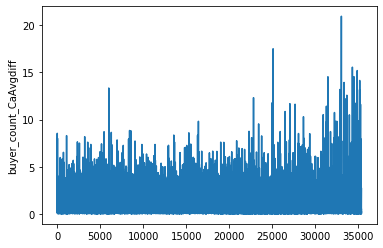

In [48]:
sns.lineplot(x = data.index,y = data['buyer_count_CaAvgdiff'])

In [49]:
data.to_csv('data/train_set/2.6buyer_count_diff.csv')